In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import re

root = '../../data/dataset/'
_, _, fns = next(os.walk(root))
print fns[0]
print len(fns)

data = {}
for fn in fns:
    res = re.findall('(CD\d{4})_(.{2})_(\d{2})_(\d{2})\.jpg', fn)
    cloth_id, press_type, press_id, frame_id = res[0]
    data.setdefault(cloth_id, {})
    data[cloth_id].setdefault(press_type, {})
    data[cloth_id][press_type].setdefault(press_id, [])
    data[cloth_id][press_type][press_id].append(fn)

for cloth_id in data:
    for press_type in data[cloth_id]:
        for press_id in data[cloth_id][press_type]:
            data[cloth_id][press_type][press_id] = sorted(data[cloth_id][press_type][press_id])
            
labels = np.loadtxt('labels.csv', dtype='str', delimiter=',')
labels = dict((int(d[0]), d[1]) for d in labels if data.has_key('CD{:04d}'.format(int(d[0]))))

categories = np.loadtxt('categories.csv', dtype='str', delimiter=',')
cat2id = dict((d[0], int(d[1])) for d in categories)
id2cat = dict((int(d[1]), d[0]) for d in categories)
cat_text = id2cat.values()
print "categories:", cat_text

CD0101_a2_10_24.jpg
110232
categories: ['broad_cloth', 'cotton', 'crepe', 'denim', 'fur', 'gaberdine', 'knit', 'parka', 'polyester', 'satin', 'suit', 'velvet', 'wool', 'woven']


In [88]:
import random
random.seed(0)
valid_ids = []
test_ids = []
train_ids = []

for label in cat_text:
    
    x = []
    for cloth_id in labels.keys():
        if labels[cloth_id] == label:
            x.append(cloth_id)
            
    c = int(round(len(x)*0.2))
    
    random.shuffle(x)
    test_ids = test_ids + x[-c:]
    valid_ids = valid_ids + x[-2*c:-c]
    train_ids = train_ids + x[:-2*c]
    
    print label, "\t", x[-c:], "\t", x[-2*c:-c]
train_ids = sorted(train_ids)
valid_ids = sorted(valid_ids)
test_ids = sorted(test_ids)
print "train_ids =", train_ids
print "valid_ids =", valid_ids
print "test_ids =", test_ids


label_dir = 'material_dataset.txt'
fout = open(label_dir, 'w')

def print_label():
    ids = sorted(train_ids + valid_ids + test_ids)
    for cloth_id in ids:
        if cloth_id in train_ids:
            train_type = 0
        elif cloth_id in valid_ids:
            train_type = 1
        else:
            train_type = 2
        cloth_id = 'CD{:04d}'.format(cloth_id)
        for press_type in data[cloth_id]:
            for press_id in data[cloth_id][press_type]:
                for fn in data[cloth_id][press_type][press_id]:
                    no_id = int(cloth_id[2:].lstrip('0'))
                    print >>fout, "{}\t{}\t{}".format(fn, cat2id[labels[no_id]], train_type)
print_label()
fout.close()

broad_cloth 	[108] 	[60]
cotton 	[72, 61] 	[29, 28]
crepe 	[99, 18] 	[16, 21]
denim 	[134] 	[104]
fur 	[74] 	[45]
gaberdine 	[143] 	[138]
knit 	[51, 100] 	[106, 39]
parka 	[68] 	[79]
polyester 	[25, 13] 	[89, 145]
satin 	[103] 	[81]
suit 	[91] 	[65]
velvet 	[128] 	[98]
wool 	[54, 56] 	[59, 130]
woven 	[80] 	[67]
train_ids = [11, 12, 14, 15, 17, 20, 22, 23, 24, 26, 27, 30, 31, 33, 34, 36, 37, 38, 40, 44, 46, 47, 48, 49, 50, 52, 58, 64, 66, 70, 71, 73, 76, 77, 78, 82, 83, 84, 85, 86, 87, 90, 92, 93, 94, 95, 97, 101, 102, 126, 129, 131, 132, 133, 135, 136, 137, 144, 146]
valid_ids = [16, 21, 28, 29, 39, 45, 59, 60, 65, 67, 79, 81, 89, 98, 104, 106, 130, 138, 145]
test_ids = [13, 18, 25, 51, 54, 56, 61, 68, 72, 74, 80, 91, 99, 100, 103, 108, 128, 134, 143]


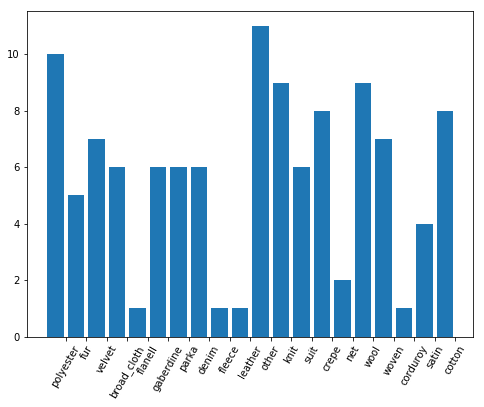

{'polyester': 10, 'fur': 5, 'velvet': 7, 'broad_cloth': 6, 'flanell': 1, 'gaberdine': 6, 'parka': 6, 'denim': 6, 'fleece': 1, 'leather': 1, 'other': 11, 'knit': 9, 'suit': 6, 'crepe': 8, 'net': 2, 'wool': 9, 'woven': 7, 'corduroy': 1, 'satin': 4, 'cotton': 8}


In [63]:
label_count = {}
plt.figure(figsize=(8,6))
for value in labels.values():
    label_count.setdefault(value, 0)
    label_count[value] += 1
plt.bar(range(len(label_count)), label_count.values())
x_num = np.arange(len(label_count)) + 0.5
plt.xticks(x_num, label_count.keys(), rotation=60)
plt.show()
print label_count

In [ ]:
import cv2
plt.figure(figsize=(15, 21))
count = 0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

for cloth_id in range(11, 109) + range(125, 147):
# for cloth_id in range(11,30):
    if cloth_id in train_ids:
        train_type = ''
    elif cloth_id in valid_ids:
        train_type = 'Valid'
    else:
        train_type = 'Test'
    if cloth_id not in labels:
        continue
        
    label = labels[cloth_id]
    if not(cat2id.has_key(label)):
        continue
        
    cloth_id = 'CD{:04d}'.format(cloth_id)
    fn = data[cloth_id]['a1']['01'][-2]
    fn = root + fn
    
    img = cv2.imread(fn)
    img = img[360-112:360+112, 480-112:480+112]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    count += 1
    plt.subplot(10, 10, count)
    plt.imshow(img)
    plt.axis('off')
    plt.text(2, 330, '{}\n{}\n{}'.format(cloth_id, label,train_type), fontdict=font)
    plt.xlabel(cloth_id)
    
plt.savefig('clothing_based.eps')

In [87]:
print train_ids

[11, 12, 14, 15, 16, 17, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 44, 45, 46, 47, 48, 49, 50, 52, 58, 59, 60, 64, 65, 66, 67, 70, 71, 73, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 97, 98, 101, 102, 104, 106, 126, 129, 130, 131, 132, 133, 135, 136, 137, 138, 144, 145, 146]


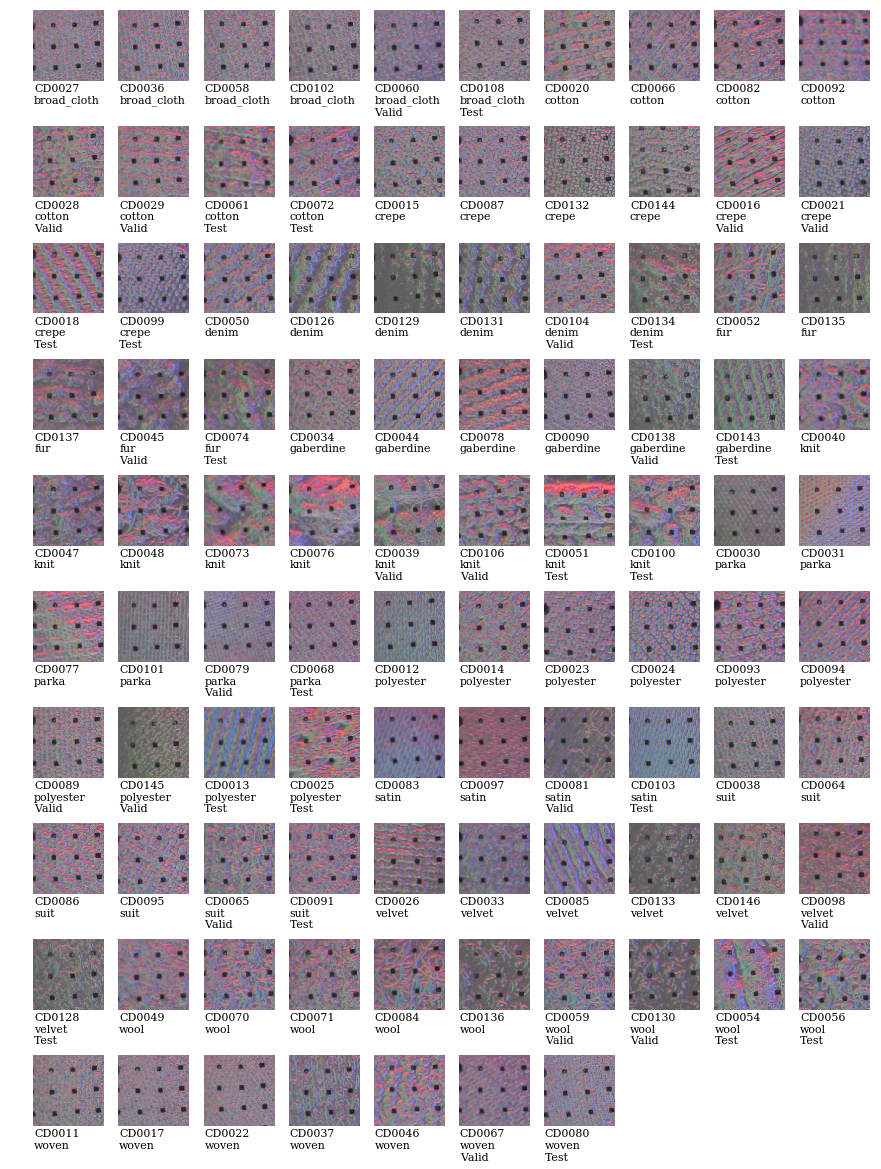

In [92]:

import cv2
plt.figure(figsize=(15, 21))
count = 0

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 11,
        }

for label in cat_text:
    for cloth_id in train_ids + valid_ids + test_ids:
        if cloth_id in train_ids:
            train_type = ''
        elif cloth_id in valid_ids:
            train_type = 'Valid'
        else:
            train_type = 'Test'
        if labels[cloth_id] == label:
            cloth_id = 'CD{:04d}'.format(cloth_id)
            if not(data.has_key(cloth_id)): continue
                
            fn = data[cloth_id]['a1']['01'][-2]
            fn = root + fn
            
            img = cv2.imread(fn)
            img = img[360-112:360+112, 480-112:480+112]
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            count += 1
            
            plt.subplot(10, 10, count)
            plt.imshow(img)
            plt.axis('off')
            plt.text(2, 330, '{}\n{}\n{}'.format(cloth_id, label, train_type), fontdict=font)
            plt.xlabel(cloth_id)
            
plt.savefig('texture_based.eps')